# INSTALLA LIBRERIE NECESSARIE

In [1]:
pip install matplotlib==3.2.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SHOW DATASET

In [3]:
#load dataset train.csv
df = pd.read_csv('train.csv')

In [4]:
#show train dataset
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4,6
1,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,5
2,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1,6
3,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8,7
4,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3913,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,6
3914,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,6
3915,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
3916,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6


In [5]:
#show number of rows
len(df)

3918

In [6]:
#show the shape of the dataset (rows, columns)
df.shape

(3918, 12)

In [7]:
#show the first elements
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4,6
1,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,5
2,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1,6
3,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8,7
4,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4,5


In [8]:
#show the last elements
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3913,6.2,0.21,0.52,6.5,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,6
3914,7.0,0.14,0.32,9.0,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,6
3915,7.6,0.27,0.52,3.2,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
3916,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6
3917,8.1,0.27,0.35,1.7,0.030,38.0,103.0,0.99255,3.22,0.63,10.4,8


In [9]:
#show more informations about dataset as type and # of null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 367.4 KB


In [10]:
#show more informations about values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.865046,0.279338,0.332731,6.450702,0.045734,35.094564,138.001149,0.994071,3.189293,0.489781,10.508840,5.871363
std,0.844483,0.101606,0.119758,5.139311,0.021797,16.676958,42.067667,0.003022,0.150183,0.113590,1.227887,0.886913
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,10.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991740,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,33.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.330000,0.380000,10.000000,0.050000,46.000000,167.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,65.800000,0.346000,146.500000,313.000000,1.038980,3.820000,1.080000,14.200000,9.000000


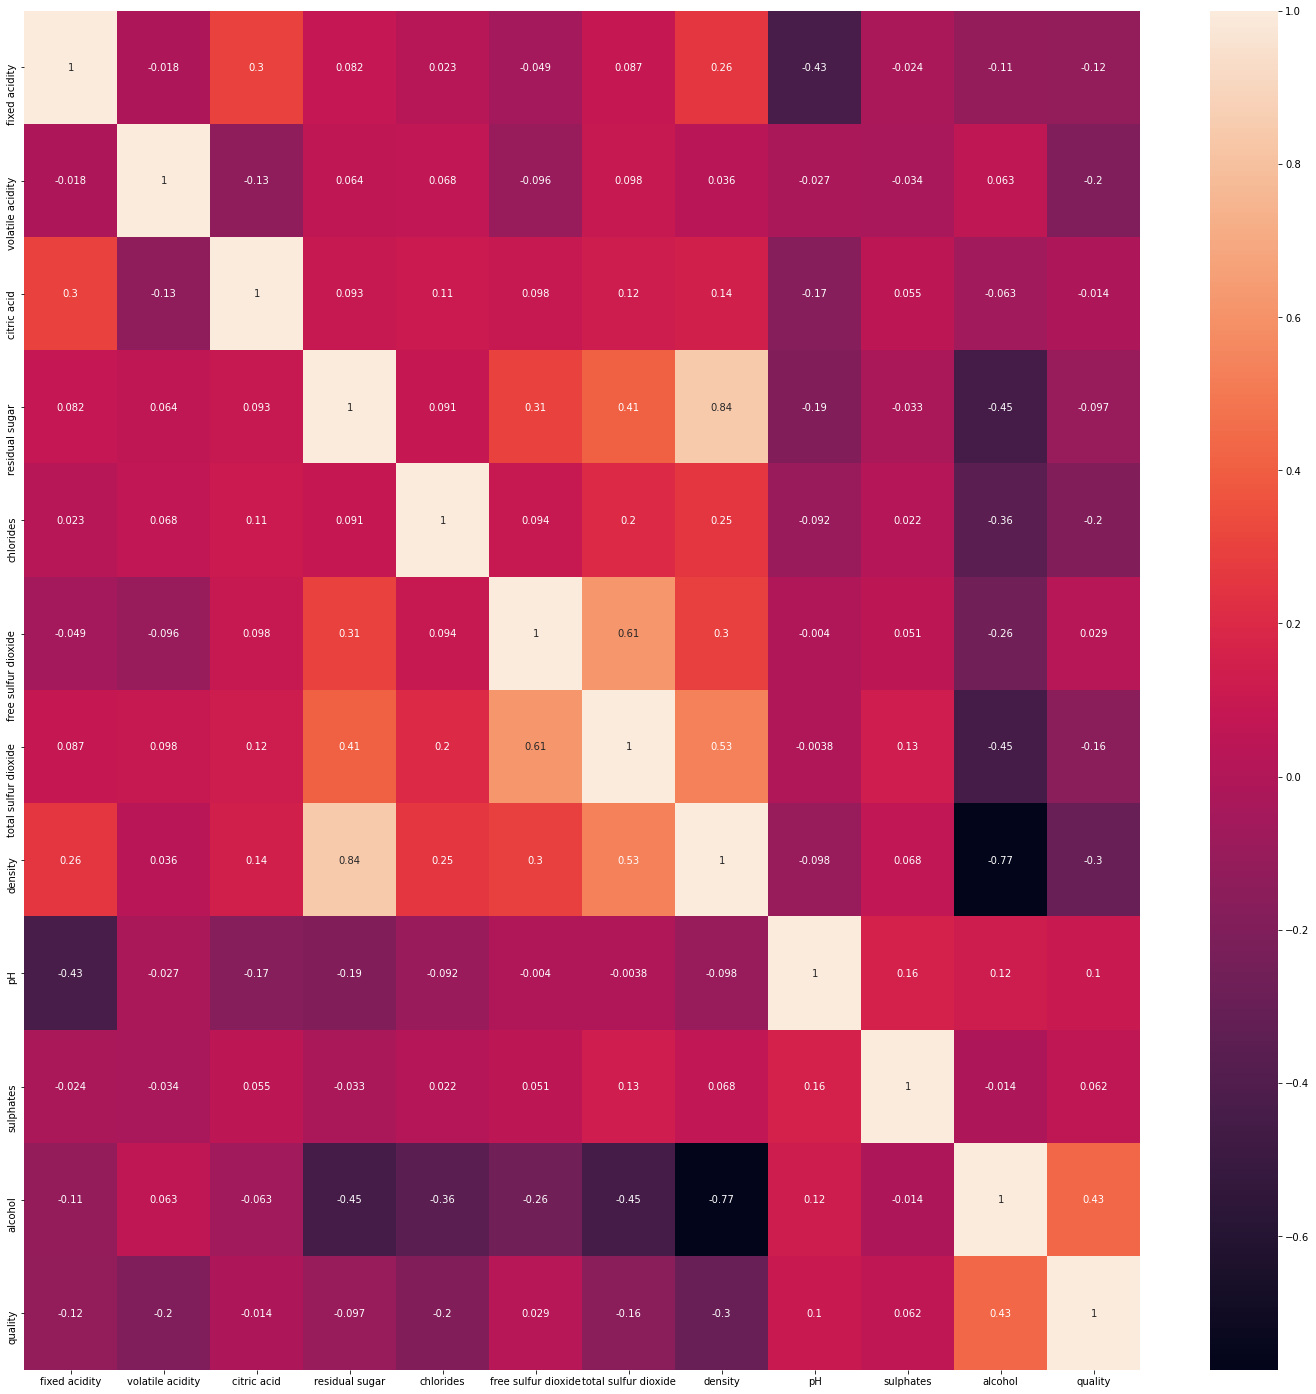

In [11]:
#show the heatmap for finding correlation beetween features
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.corr(), annot=True)

In [12]:
#clustering the quality
#0-2   ->  1
#3-4   ->  2
#5-6   ->  3
#7-8   ->  4
#9-10  ->  5
df = df.assign(classe=1)
df.loc[df['quality'] > 2, 'classe'] = 2
df.loc[df['quality'] > 4, 'classe'] = 3
df.loc[df['quality'] > 6, 'classe'] = 4
df.loc[df['quality'] > 8, 'classe'] = 5

columnToDrop = ['quality']
df = df.drop(columnToDrop, axis=1)

In [13]:
#show more informations about values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,classe
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.865046,0.279338,0.332731,6.450702,0.045734,35.094564,138.001149,0.994071,3.189293,0.489781,10.508840,3.174834
std,0.844483,0.101606,0.119758,5.139311,0.021797,16.676958,42.067667,0.003022,0.150183,0.113590,1.227887,0.474318
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,10.000000,0.987110,2.720000,0.220000,8.000000,2.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991740,3.090000,0.410000,9.500000,3.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,33.000000,134.000000,0.993800,3.180000,0.470000,10.400000,3.000000
75%,7.300000,0.330000,0.380000,10.000000,0.050000,46.000000,167.000000,0.996200,3.280000,0.550000,11.400000,3.000000
max,11.800000,1.100000,1.660000,65.800000,0.346000,146.500000,313.000000,1.038980,3.820000,1.080000,14.200000,5.000000


# TRAINING

In [14]:
#load dataset test.csv
df_test = pd.read_csv('test.csv')

In [15]:
#make the same operation on test dataset
df_test = df_test.assign(classe=1)
df_test.loc[df_test['quality'] > 2, 'classe'] = 2
df_test.loc[df_test['quality'] > 4, 'classe'] = 3
df_test.loc[df_test['quality'] > 6, 'classe'] = 4
df_test.loc[df_test['quality'] > 8, 'classe'] = 5


columnToDrop = ['quality']
df_test = df_test.drop(columnToDrop, axis=1)

In [16]:
#split train data features(X_train) and target (y_train)
y_train = df.pop('classe')
X_train = df

#split test data features(X_train) and target (y_train)
y_test = df_test.pop('classe')
X_test = df_test

In [17]:
#scale values
sc = StandardScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(sc.fit_transform(X_test),columns = X_test.columns)

Accuracy: 75.51%


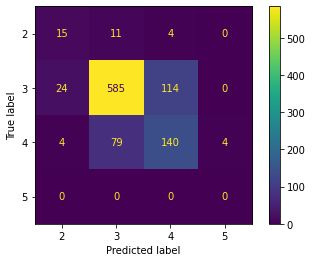

In [18]:
#train the model using a single Decison Tree

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuracy: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values);
plt.show()

Accuracy: 75.31%


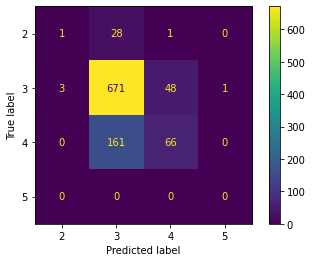

In [19]:
#train the model using Logistic Regression

clf = LogisticRegression(random_state=0,max_iter=200)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuracy: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values);
plt.show()

Accuracy: 85.31%


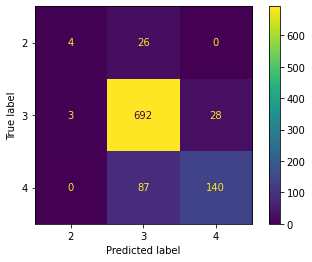

In [20]:
#train the model using Random Forest Classifier

clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuracy: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values)
plt.show()

Accuratezza: 82.04%


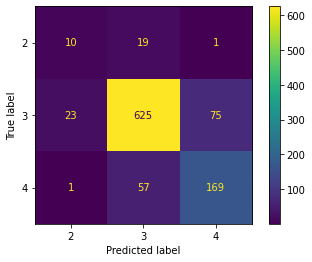

KNeighborsClassifier()

In [21]:
#train the model using K-NN

clf = KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values)
plt.show()

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# TRAINING WITH DROPPED COLUMNS

In [22]:
#column to delete
columnToDrop = ['fixed acidity', 'citric acid','free sulfur dioxide','sulphates']
df = df.drop(columnToDrop, axis=1)

#same operations on test set
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(columnToDrop, axis=1)

Accuratezza: 74.69%


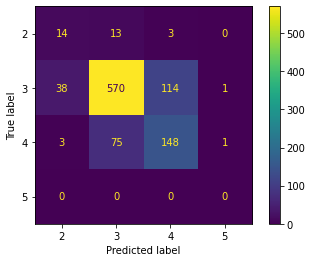

In [23]:
#train the model using a single Decison Tree

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values);
plt.show()

Accuratezza: 75.31%


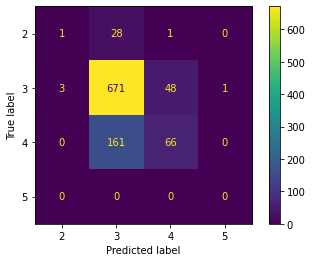

In [24]:
#train the model using Logistic Regression

clf = LogisticRegression(random_state=0,max_iter=200)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values);
plt.show()

Accuratezza: 85.1%


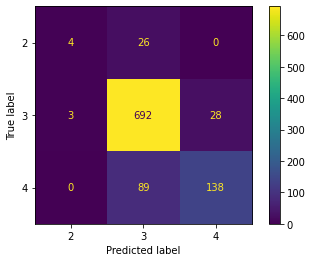

In [25]:
#train the model using Random Forest Classifier

clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values)
plt.show()

Accuratezza: 82.04%


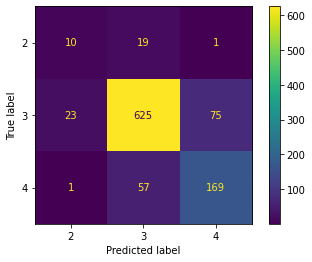

KNeighborsClassifier()

In [26]:
#train the model using K-NN

clf = KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values)
plt.show()

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)